<a href="https://colab.research.google.com/github/Priyanshi0912/Calculator/blob/main/Final_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
d = pd.read_csv('heart.csv')
columns_to_drop = ['stage']
d = d.drop(columns=columns_to_drop)
d

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [ ]:
# Encode categorical columns
le = LabelEncoder()
categorical_columns = [1, 2, 6, 8, 10]
for col in categorical_columns:
    d.iloc[:, col] = le.fit_transform(d.iloc[:, col])

### Predicting Heart Disease (0/1)

In [ ]:
x=d.iloc[:,0:11]
y=d.iloc[:,-1]

In [ ]:
#Decision Tree

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.525,random_state=0)
DC=DecisionTreeClassifier()
DC=DC.fit(x_train,y_train)
y_pred_DC=DC.predict(x_test)
accuracy_DT=metrics.accuracy_score(y_test,y_pred_DC)
x1=accuracy_DT
print("accuracy",accuracy_DT)

accuracy 0.7925311203319502


In [ ]:
#KNN

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5250,random_state=0)
st=StandardScaler()
x_train=st.fit_transform(x_train)
x_test=st.transform(x_test)
KNN=KNeighborsClassifier(n_neighbors=8,metric='minkowski',p=2)
KNN.fit(x_train,y_train)
y_pred_KNN=KNN.predict(x_test)
accuracy_KNN=metrics.accuracy_score(y_test,y_pred_KNN)
y1=accuracy_KNN
print('Accuracy :',accuracy_KNN)

Accuracy : 0.8423236514522822


In [ ]:
#Random forest
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)
rfclassifier=RandomForestClassifier()
rfclassifier=rfclassifier.fit(x_train,y_train)
y_pred_RF=rfclassifier.predict(x_test)
accuracy_RF=metrics.accuracy_score(y_test,y_pred_RF)
z1=accuracy_RF
print("accuracy",accuracy_RF)

accuracy 0.8679867986798679


### Real Time Input (GUI)

In [ ]:
input_data=(58,1,	1,	136	,164,	0	,2	,99	,1,	2,	1)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

In [ ]:
print("Decision Tree")
prediction=DC.predict(input_data_reshaped)
if prediction==1:
  print("The person has heart disease")
else:
  print("The person does not have heart disease")

Decision Tree
The person has heart disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print("KNN")
prediction=KNN.predict(input_data_reshaped)
if prediction==1:
  print("The person has heart disease")
else:
  print("The person does not have heart disease")

KNN
The person has heart disease


In [ ]:
print("Random forest")
prediction=rfclassifier.predict(input_data_reshaped)
if prediction==1:
  print("The person has heart disease")
else:
  print("The person does not have heart disease")

Random forest
The person has heart disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### Stages Prediction

In [ ]:
d['stage'] = 0

d.loc[(d['HeartDisease'] == 1) & (d['Cholesterol'] > 240) & (d['ChestPainType'] == 1) & (d['RestingECG'] == 0) & (d['ExerciseAngina']==0) & (d['FastingBS']==1), 'stage'] = 3
d.loc[(d['HeartDisease'] == 1)  & (d['ChestPainType'] == 2) & (d['RestingECG'] == 2), 'stage'] = 2
d.loc[(d['HeartDisease'] == 1) & (d['Cholesterol'] <= 240) & (d['ChestPainType'] == 0) & (d['RestingECG'] == 1) & (d['ExerciseAngina']==1) & (d['FastingBS']==0) , 'stage'] = 1


d.to_csv('heart.csv', index=False)
d

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,stage
0,40,1,1,140,289,0,1,172,0,0.0,2,0,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1,0
2,37,1,1,130,283,0,2,98,0,0.0,2,0,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1,0
914,68,1,0,144,193,1,1,141,0,3.4,1,1,0
915,57,1,0,130,131,0,1,115,1,1.2,1,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1,0


In [ ]:
x = d.iloc[:, 0:12]
y = d.iloc[:, -1]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
#Decision Tree

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_classifier.fit(x_train, y_train)

# Predict the stages on the testing data
y_pred_dt = dt_classifier.predict(x_test)

# Evaluate the Decision Tree model
accuracy_dt = metrics.accuracy_score(y_test, y_pred_dt)
x2=accuracy_dt
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

# Confusion matrix
conf_matrix_dt = metrics.confusion_matrix(y_test, y_pred_dt)
print("Decision Tree Confusion Matrix:\n", conf_matrix_dt)

# Classification report
class_report_dt = metrics.classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report:\n", class_report_dt)


Decision Tree Accuracy: 0.98
Decision Tree Confusion Matrix:
 [[168   0   3]
 [  0   9   0]
 [  0   0   4]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       171
           1       1.00      1.00      1.00         9
           2       0.57      1.00      0.73         4

    accuracy                           0.98       184
   macro avg       0.86      0.99      0.91       184
weighted avg       0.99      0.98      0.99       184



In [ ]:
#KNN

# K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn_classifier.fit(x_train, y_train)

# Predict the stages on the testing data
y_pred_knn = knn_classifier.predict(x_test)

# Evaluate the KNN model
accuracy_knn = metrics.accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")

y2=accuracy_knn

# Confusion matrix
conf_matrix_knn = metrics.confusion_matrix(y_test, y_pred_knn)
print("KNN Confusion Matrix:\n", conf_matrix_knn)

# Classification report
class_report_knn = metrics.classification_report(y_test, y_pred_knn)
print("KNN Classification Report:\n", class_report_knn)


KNN Accuracy: 0.94
KNN Confusion Matrix:
 [[164   7   0]
 [  2   7   0]
 [  2   0   2]]
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       171
           1       0.50      0.78      0.61         9
           2       1.00      0.50      0.67         4

    accuracy                           0.94       184
   macro avg       0.83      0.75      0.75       184
weighted avg       0.95      0.94      0.94       184



In [ ]:
#Random Forest

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_classifier.fit(x_train, y_train)

# Predict the stages on the testing data
y_pred = rf_classifier.predict(x_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.2f}")

z2=accuracy

# Confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Random Forest Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = metrics.classification_report(y_test, y_pred)
print("Random Forest Classification Report:\n", class_report)

Random Forest Accuracy: 0.98
Random Forest Confusion Matrix:
 [[171   0   0]
 [  1   8   0]
 [  2   0   2]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       171
           1       1.00      0.89      0.94         9
           2       1.00      0.50      0.67         4

    accuracy                           0.98       184
   macro avg       0.99      0.80      0.87       184
weighted avg       0.98      0.98      0.98       184



In [ ]:
g = d.groupby('stage')
c=[]
for stage, count in g:
    print(f"Stage: {stage}")
    per=((count.shape[0])/918)*100
    c.append(count.shape[0])
    print(f"Count: {count.shape[0]}")  # Count the number of elements in the group
    print("----")

Stage: 0
Count: 836
----
Stage: 1
Count: 61
----
Stage: 2
Count: 20
----
Stage: 3
Count: 1
----


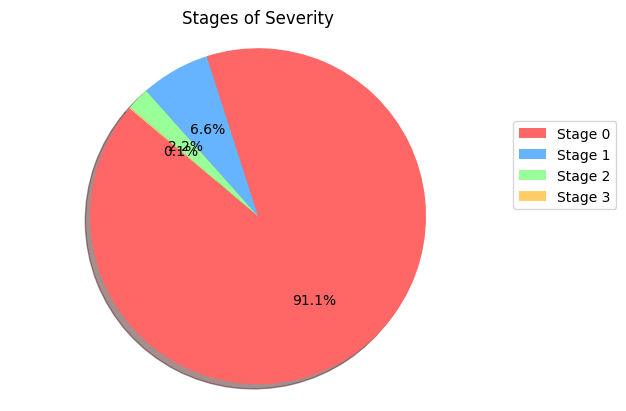

In [ ]:
import matplotlib.pyplot as plt

labels = ['Stage 0','Stage 1', 'Stage 2', 'Stage 3']
sizes = [c[0], c[1], c[2],c[3]]

colors = ['#ff6666', '#66b3ff', '#99ff99', '#ffcc66']

plt.pie(sizes , colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Stages of Severity')
plt.legend( labels, loc="lower left", bbox_to_anchor=(1, 0.5))
plt.axis('equal')
plt.show()


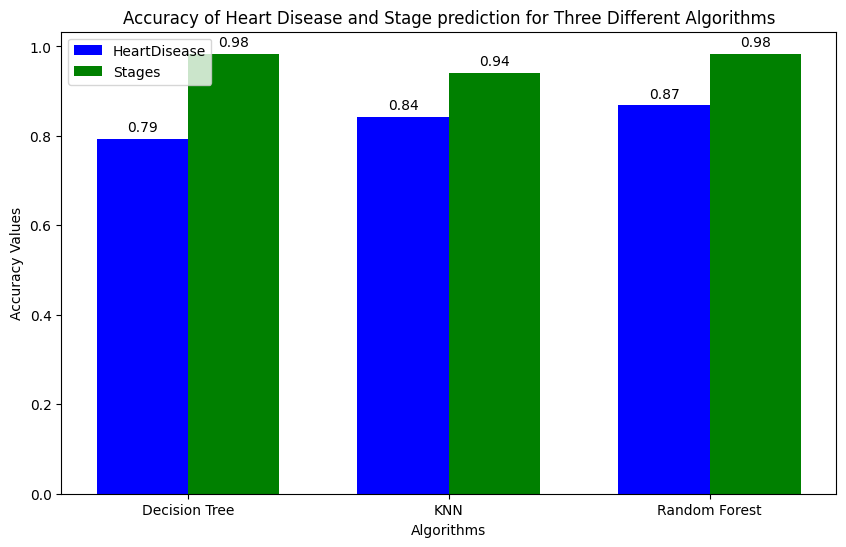

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


categories = ['Decision Tree', 'KNN', 'Random Forest']
accuracy_heartdisease = [x1, y1, z1]
accuracy_stages = [x2, y2, z2]


bar_width = 0.35
index = np.arange(len(categories))

plt.figure(figsize=(10, 6))

plt.bar(index, accuracy_heartdisease, bar_width, label='HeartDisease', color='blue', align='center')
plt.bar(index + bar_width, accuracy_stages, bar_width, label='Stages', color='green', align='center')

plt.xlabel('Algorithms')
plt.ylabel('Accuracy Values')
plt.title('Accuracy of Heart Disease and Stage prediction for Three Different Algorithms')
plt.xticks(index + bar_width / 2, categories)
plt.legend(loc='upper left')

for i, value in enumerate(accuracy_heartdisease):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

for i, value in enumerate(accuracy_stages):
    plt.text(i + bar_width, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.show()


### Prediction of the Heart Disease

In [ ]:
d['Disease'] = ''

d.loc[(d['HeartDisease'] == 1)   &  (d['Cholesterol'] <=100) & (d['FastingBS'] == 1)  & (d['RestingBP'] >= 120)& (d['ExerciseAngina'] == 0) & (d['Age'] >=45) & (d['Sex'] == 1), 'Disease'] = 'CAD'
d.loc[(d['HeartDisease'] == 1)   &  (d['Cholesterol'] >=40) & (d['FastingBS'] == 1)  & (d['RestingBP'] >= 120)& (d['ExerciseAngina'] == 0) & (d['Age'] >=45) & (d['Sex'] == 1), 'Disease'] = 'CAD'
d.loc[(d['HeartDisease'] == 1) & (d['Cholesterol'] <=100) & (d['FastingBS'] == 1)  & (d['RestingBP'] >= 120) &(d['ExerciseAngina'] == 0) & (d['Age'] >=50) & (d['Sex'] == 0), 'Disease'] = 'CAD'
d.loc[(d['HeartDisease'] == 1) & (d['Cholesterol'] >= 50) & (d['FastingBS'] == 1)  & (d['RestingBP'] >= 120) &(d['ExerciseAngina'] == 0) & (d['Age'] >=50) & (d['Sex'] == 0), 'Disease'] = 'CAD'
d.loc[(d['HeartDisease'] == 1) & (d['Cholesterol'] < 140)  & (d['RestingBP'] >= 120)  , 'Disease'] ='Heart Attack'
d.loc[(d['HeartDisease'] == 1) & (d['Cholesterol'] >200)  & (d['RestingBP'] >= 120)  , 'Disease'] ='Heart Attack'
d.loc[(d['HeartDisease'] == 1) & (d['ChestPainType'] ==2)   & (d['MaxHR'] >100)  , 'Disease'] = 'Noncardiac Chest Pain'
d.loc[(d['HeartDisease'] == 1) & (d['ChestPainType'] ==1)   & (d['MaxHR'] >100) & (d['RestingECG'] ==1)  , 'Disease'] = 'Pericarditis'
d.loc[(d['HeartDisease'] == 1) & (d['ChestPainType'] ==0)   & (d['MaxHR'] >100)   , 'Disease'] = 'Ventricular Tachycardia'
d.loc[(d['HeartDisease'] == 1) & (d['Cholesterol'] ==0)     , 'Disease'] = 'Stroke'
d.loc[(d['HeartDisease'] == 1) & (d['RestingECG'] ==2)     , 'Disease'] = 'LVH'
d.loc[(d['HeartDisease'] == 1) & (d['RestingECG'] ==1)     , 'Disease'] = 'CVR'
d.loc[(d['HeartDisease']==0),'Disease']='No Heart Disease'
d


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,stage,Disease
0,40,1,1,140,289,0,1,172,0,0.0,2,0,0,No Heart Disease
1,49,0,2,160,180,0,1,156,0,1.0,1,1,0,CVR
2,37,1,1,130,283,0,2,98,0,0.0,2,0,0,No Heart Disease
3,48,0,0,138,214,0,1,108,1,1.5,1,1,1,CVR
4,54,1,2,150,195,0,1,122,0,0.0,2,0,0,No Heart Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1,0,CVR
914,68,1,0,144,193,1,1,141,0,3.4,1,1,0,CVR
915,57,1,0,130,131,0,1,115,1,1.2,1,1,1,CVR
916,57,0,1,130,236,0,0,174,0,0.0,1,1,0,Heart Attack


In [ ]:
import pandas as pd
grouped_data = d.groupby('Disease')

for group_name, group_data in grouped_data:
    print(f"Disease: {group_name}")

    print(f"Count: {group_data.shape[0]}")  # Count the number of elements in the group
    print("----")


Disease: CAD
Count: 1
----
Disease: CVR
Count: 285
----
Disease: Heart Attack
Count: 13
----
Disease: LVH
Count: 117
----
Disease: No Heart Disease
Count: 410
----
Disease: Noncardiac Chest Pain
Count: 10
----
Disease: Stroke
Count: 11
----
Disease: Ventricular Tachycardia
Count: 71
----


Text(0.5, 1.0, 'Heart Disease Prediction \n')

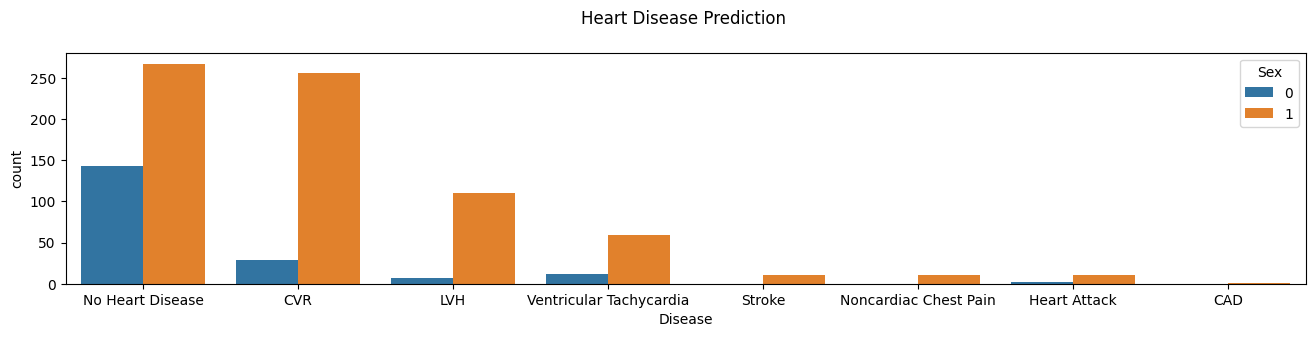

In [ ]:
fig,ax = plt.subplots(figsize=(16, 3))
sns.countplot(data= d, x='Disease',hue='Sex',ax=ax)
plt.title('Heart Disease Prediction \n')


In [ ]:
# Taking user input and converting to appropriate types
Age = int(input("Enter Age: "))
Sex = int(input("Enter Sex (1 or 0): "))
ChestPainType = int(input("Enter ChestPainType: "))
RestingBP = int(input("Enter RestingBP: "))
Cholesterol = int(input("Enter Cholesterol: "))
FastingBS = int(input("Enter FastingBS (1 or 0): "))
RestingECG = int(input("Enter RestingECG: "))
MaxHR = int(input("Enter MaxHR: "))
ExerciseAngina = int(input("Enter ExerciseAngina (1 or 0): "))




# Your original conditions with input values
if (
    Cholesterol < 101 and FastingBS == 1 and RestingBP > 120
    and ExerciseAngina == 0 and Age > 45 and Sex == 1
):
    print('Coronary Artery Disease')
elif (
    Cholesterol > 40 and FastingBS == 1 and RestingBP > 120
    and ExerciseAngina == 0 and Age > 45 and Sex == 1
):
    print('Coronary Artery Disease')
elif (
    Cholesterol < 100 and FastingBS == 1 and RestingBP > 120
    and ExerciseAngina == 0 and Age > 50 and Sex == 0
):
    print('Coronary Artery Disease')
elif (
    Cholesterol > 50 and FastingBS == 1 and RestingBP > 120
    and ExerciseAngina == 0 and Age > 50 and Sex == 0
):
    print('Coronary Artery Disease')
elif (
    Cholesterol < 140 and RestingBP > 120
    and Age > 0 and (Sex == 1 or Sex == 0)
):
    print('Heart Attack')
elif (
    Cholesterol > 200 and RestingBP > 120
    and Age > 0 and (Sex == 1 or Sex == 0)
):
    print('Heart Attack')
elif (
    ChestPainType == 2 and MaxHR > 100
    and Age > 0 and (Sex == 1 or Sex == 0)
):
    print('Noncardiac Chest Pain')
elif (
    ChestPainType == 1 and MaxHR > 100 and RestingECG == 1
    and Age > 0 and (Sex == 1 or Sex == 0)
):
    print('Pericarditis')
elif (
    ChestPainType == 0 and MaxHR > 100
    and Age > 0 and (Sex == 1 or Sex == 0)
):
    print('Ventricular Tachycardia')
elif (
    Cholesterol == 0 and Age > 0 and (Sex == 1 or Sex == 0)
):
    print('Stroke')
elif (
    RestingECG == 2 and Age > 0 and (Sex == 1 or Sex == 0)
):
    print('Left Ventricle Hypertrophy')
elif (
    RestingECG == 1 and Age > 0 and (Sex == 1 or Sex == 0)
):
    print('Cardiovascular Risk')
else:
    print('No Heart Disease')
